In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np

$$\begin{alignat}{2}
& \max OF_1 , OF_2\\
&OF_1=2x_1-0.5x^2_2\\
& OF_2=-1.2x^2_1+2.5x_2\\
& OF_2 \leq \epsilon \\
& x_1,x_2 \geq 2
\end{alignat}$$


In [2]:
model = ConcreteModel()
model.epsilon=Param(initialize=10000,mutable=True)
model.x1 = Var(bounds=(1,2), within=NonNegativeReals)
model.x2 = Var(bounds=(1,3), within=NonNegativeReals)
model.OF1= Var(bounds=(-10000,10000), within=NonNegativeReals)
model.OF2= Var(bounds=(-10000,10000), within=NonNegativeReals)
model.eq1= Constraint(expr= model.OF2==-1.2*model.x1**2+5*model.x2)
model.eq2= Constraint(expr= model.OF2<=model.epsilon)
model.eq3= Constraint(expr= model.OF1==2*model.x1-0.5*model.x2**2)
model.obj1 = Objective(expr=model.OF1, sense=maximize)
model.obj2 = Objective(expr=model.OF2, sense=maximize)
opt = SolverFactory('ipopt')

In [3]:
model.obj2.deactivate() 
results = opt.solve(model) # solves and updates instance
print('x1 = ',round(value(model.x1),2))
print('x2 = ',round(value(model.x2),2))
print('obj1 = ',round(value(model.obj1),2))
print('obj2 = ',round(value(model.obj2),2))
maxOF1=value(model.obj1)
minOF2=value(model.obj2)

x1 =  2.0
x2 =  1.0
obj1 =  3.5
obj2 =  0.2


In [4]:
model.obj1.deactivate() 
model.obj2.activate() 
results = opt.solve(model) # solves and updates instance
print('x1 = ',round(value(model.x1),2))
print('x2 = ',round(value(model.x2),2))
print('obj1 = ',round(value(model.obj1),2))
print('obj2 = ',round(value(model.obj2),2))
minOF1=value(model.obj1)
maxOF2=value(model.obj2)

x1 =  1.63
x2 =  2.55
obj1 =  0.0
obj2 =  9.58


In [5]:
Nsteps=21
X=[]
Y=[]
print('  x1  ',' x2 ',' OF1 ',' OF2 ',' Epsilon ')
for counter in range(1,Nsteps+1):
    model.epsilon=minOF2+(maxOF2-minOF2)*(counter-1)/(Nsteps-1)
    results = opt.solve(model) # solves and updates instance
    print("%5.2f"% value(model.x1),"%5.2f"% value(model.x2),"%5.2f"% value(model.obj1),"%5.2f"% value(model.obj2), "%5.2f"% value(model.epsilon))
    X.append(value(model.obj1))
    Y.append(value(model.obj2))

  x1    x2   OF1   OF2   Epsilon 
 2.00  1.00  3.50  0.20  0.20
 1.95  1.05  3.35  0.67  0.67
 1.90  1.10  3.20  1.14  1.14
 1.86  1.15  3.05  1.61  1.61
 1.81  1.20  2.90  2.08  2.08
 1.77  1.26  2.75  2.54  2.54
 1.74  1.33  2.59  3.01  3.01
 1.70  1.39  2.44  3.48  3.48
 1.67  1.46  2.28  3.95  3.95
 1.65  1.54  2.12  4.42  4.42
 1.63  1.61  1.95  4.89  4.89
 1.61  1.69  1.78  5.36  5.36
 1.59  1.77  1.61  5.83  5.83
 1.58  1.86  1.43  6.30  6.30
 1.56  1.94  1.25  6.77  6.77
 1.55  2.03  1.05  7.23  7.23
 1.54  2.11  0.86  7.70  7.70
 1.53  2.20  0.65  8.17  8.17
 1.53  2.29  0.44  8.64  8.64
 1.54  2.39  0.22  9.11  9.11
 1.63  2.55  0.00  9.58  9.58


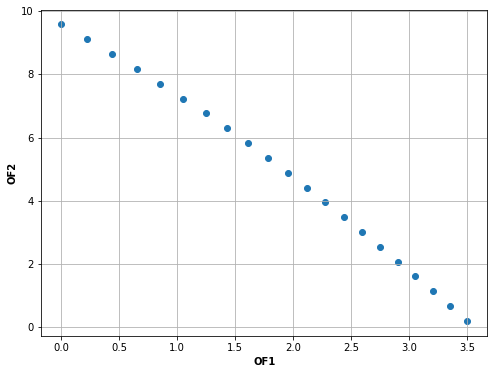

In [6]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.xlabel('OF1',fontweight='bold')
plt.ylabel('OF2',fontweight='bold')
plt.grid()
plt.show()